<h1>Pandas</h1>

In [48]:
from numpy import pi
x = np.linspace(0, 2*pi, 100)
f=np.sin(x)
print(np.ceil(f.max()-f.min()))

2.0


In [1]:
#installing pandas libraries
!pip install pandas-datareader
!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

Requirement already up-to-date: html5lib==1.0b8 in c:\users\carmt\appdata\local\programs\python\python37-32\lib\site-packages (1.0b8)


<h2>Imports</h2>

In [2]:
import pandas as pd #pandas library
from pandas_datareader import data #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>The structure of a dataframe</h2>

In [3]:
pd.DataFrame([[1,2,3],[1,2,3]],columns=['A','B','C'])

A  B  C
0  1  2  3
1  1  2  3

<h3>Accessing columns and rows</h3>

In [4]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
print(id(df))
df.set_index('row_label',inplace=True)
print(id(df))
df

284096560
284096560


A   B   C
row_label            
r1         00  01  02
r2         10  11  12
r3         20  21  22

<h3>Getting column data</h3>

In [5]:
df['B']

row_label
r1    01
r2    11
r3    21
Name: B, dtype: object

<h3>Getting row data</h3>

In [6]:
df.loc['r1']

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting a row by row number</h3>

In [7]:
df.iloc[0]

A    00
B    01
C    02
Name: r1, dtype: object

<h3>Getting multiple columns<h3>

In [8]:
df[['B','A']] #Note that the column identifiers are in a list

B   A
row_label        
r1         01  00
r2         11  10
r3         21  20

<h3>Getting a specific cell</h3>

In [9]:
df.loc['r2','B']

'11'

In [10]:
df.loc['r2']['A']

'10'

<h3>Slicing</h3>

In [11]:
df.loc['r1':'r2']

A   B   C
row_label            
r1         00  01  02
r2         10  11  12

In [12]:
df.loc['r1':'r2','B':'C']

B   C
row_label        
r1         01  02
r2         11  12

<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [13]:
df_list = pd.read_html('https://finance.yahoo.com/currencies')
print(len(df_list))

1


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [14]:
df = df_list[0]
print(df)

      Symbol      Name  Last Price  Change  % Change  52 Week Range  Day Chart
0   BTCUSD=X   BTC/USD   3875.9692  0.0000  -0.0000%            NaN        NaN
1   ETHUSD=X  ETHUSD=X    152.0351  0.0000  -0.0000%            NaN        NaN
2   EURUSD=X   EUR/USD      1.1459  0.0013  +0.1146%            NaN        NaN
3      JPY=X   USD/JPY    109.4800  0.6560  +0.6028%            NaN        NaN
4   GBPUSD=X   GBP/USD      1.3081 -0.0031  -0.2394%            NaN        NaN
5   AUDUSD=X   AUD/USD      0.7255 -0.0019  -0.2612%            NaN        NaN
6   NZDUSD=X   NZD/USD      0.6900 -0.0018  -0.2622%            NaN        NaN
7   EURJPY=X   EUR/JPY    125.4100  0.8500    +0.68%            NaN        NaN
8   GBPJPY=X   GBP/JPY    143.2100  0.5670    +0.40%            NaN        NaN
9   EURGBP=X   EUR/GBP      0.8759  0.0028    +0.32%            NaN        NaN
10  EURCAD=X   EUR/CAD      1.4988 -0.0037    -0.25%            NaN        NaN
11  EURSEK=X   EUR/SEK     10.3806  0.0303    +0.29%

<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [15]:
df.set_index('Symbol',inplace=True)
print(df)

              Name  Last Price  Change  % Change  52 Week Range  Day Chart
Symbol                                                                    
BTCUSD=X   BTC/USD   3875.9692  0.0000  -0.0000%            NaN        NaN
ETHUSD=X  ETHUSD=X    152.0351  0.0000  -0.0000%            NaN        NaN
EURUSD=X   EUR/USD      1.1459  0.0013  +0.1146%            NaN        NaN
JPY=X      USD/JPY    109.4800  0.6560  +0.6028%            NaN        NaN
GBPUSD=X   GBP/USD      1.3081 -0.0031  -0.2394%            NaN        NaN
AUDUSD=X   AUD/USD      0.7255 -0.0019  -0.2612%            NaN        NaN
NZDUSD=X   NZD/USD      0.6900 -0.0018  -0.2622%            NaN        NaN
EURJPY=X   EUR/JPY    125.4100  0.8500    +0.68%            NaN        NaN
GBPJPY=X   GBP/JPY    143.2100  0.5670    +0.40%            NaN        NaN
EURGBP=X   EUR/GBP      0.8759  0.0028    +0.32%            NaN        NaN
EURCAD=X   EUR/CAD      1.4988 -0.0037    -0.25%            NaN        NaN
EURSEK=X   EUR/SEK     10

<h4>Now we can use .loc to extract specific currency rates</h4>

In [16]:
df.loc['EURCHF=X','Last Price']

1.1401

<h3>Working with views and copies</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [17]:
eur_usd = df.loc['EURUSD=X']['Change'] #This is chained indexing
df.loc['EURUSD=X']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['EURUSD=X']['Change']) #Neither eur_usd, nor the dataframe are changed

0.0013
0.0013


c:\users\carmt\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
eur_usd = df.loc['EURUSD=X','Change'] #eur_usd points to the value inside the dataframe
df.loc['EURUSD=X','Change'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['EURUSD=X']['Change']) #The dataframe has been correctly updated

0.0013
1.0


<h2>Getting historical stock prices from Google financs</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>
Unfortunately, the Yahoo finance datareader has stopped working because of a change to Yahoo's website


In [19]:
from pandas_datareader import data
import datetime as dt
start=dt.datetime(2017, 1, 1)
end=dt.datetime.today()


print(start,end)


df = data.DataReader('GOOG', 'yahoo', start, end)


2017-01-01 00:00:00 2019-02-03 10:57:35.574709


In [20]:
df

High          Low         Open        Close   Volume  \
Date                                                                      
2017-01-03   789.630005   775.799988   778.809998   786.140015  1657300   
2017-01-04   791.340027   783.159973   788.359985   786.900024  1073000   
2017-01-05   794.479980   785.020020   786.080017   794.020020  1335200   
2017-01-06   807.900024   792.203979   795.260010   806.150024  1640200   
2017-01-09   809.966003   802.830017   806.400024   806.650024  1272400   
2017-01-10   809.130005   803.510010   807.859985   804.789978  1176800   
2017-01-11   808.150024   801.369995   805.000000   807.909973  1065900   
2017-01-12   807.390015   799.169983   807.140015   806.359985  1353100   
2017-01-13   811.223999   806.690002   807.479980   807.880005  1099200   
2017-01-17   807.140015   800.369995   807.080017   804.609985  1355800   
2017-01-18   806.205017   800.989990   805.809998   806.070007  1294400   
2017-01-19   809.479980   801.799988   805.119995   802.174988   919300   
2017-01-20   806.909973   801.690002   806.909973   805.020020  1670000   
2017-01-23   820.869995   803.739990   807.250000   819.309998  1963600   
2017-01-24   825.900024   817.820984   822.299988   823.869995  1474000   
2017-01-25   835.770020   825.059998   829.619995   835.669983  1494500   
2017-01-26   838.000000   827.010010   837.809998   832.150024  2973900   
2017-01-27   841.950012   820.440002   834.710022   823.309998  2965800   
2017-01-30   815.840027   799.799988   814.659973   802.320007  3246600   
2017-01-31   801.250000   790.520020   796.859985   796.789978  2160600   
2017-02-01   801.190002   791.190002   799.679993   795.695007  2029700   
2017-02-02   802.700012   792.000000   793.799988   798.530029  1532100   
2017-02-03   806.000000   800.369995   802.989990   801.489990  1463400   
2017-02-06   801.669983   795.250000   799.700012   801.340027  1184500   
2017-02-07   810.500000   801.780029   803.989990   806.969971  1241200   
2017-02-08   811.840027   803.190002   807.000000   808.380005  1155300   
2017-02-09   810.659973   804.539978   809.510010   809.559998   989700   
2017-02-10   815.250000   809.780029   811.700012   813.669983  1135000   
2017-02-13   820.958984   815.489990   816.000000   819.239990  1213300   
2017-02-14   823.000000   816.000000   819.000000   820.450012  1053600   
...                 ...          ...          ...          ...      ...   
2018-12-19  1062.000000  1008.049988  1033.989990  1023.010010  2479300   
2018-12-20  1034.219971   996.359985  1018.130005  1009.409973  2673500   
2018-12-21  1024.020020   973.690002  1015.299988   979.539978  4596000   
2018-12-24  1003.539978   970.109985   973.900024   976.219971  1590300   
2018-12-26  1040.000000   983.000000   989.010010  1039.459961  2373300   
2018-12-27  1043.890015   997.000000  1017.150024  1043.880005  2109800   
2018-12-28  1055.560059  1033.099976  1049.619995  1037.079956  1414800   
2018-12-31  1052.699951  1023.590027  1050.959961  1035.609985  1493300   
2019-01-02  1052.319946  1015.710022  1016.570007  1045.849976  1532600   
2019-01-03  1056.979980  1014.070007  1041.000000  1016.059998  1841100   
2019-01-04  1070.839966  1027.417969  1032.589966  1070.709961  2093900   
2019-01-07  1074.000000  1054.760010  1071.500000  1068.390015  1981900   
2019-01-08  1084.560059  1060.530029  1076.109985  1076.280029  1764900   
2019-01-09  1082.630005  1066.400024  1081.650024  1074.660034  1199300   
2019-01-10  1071.150024  1057.709961  1067.660034  1070.329956  1456400   
2019-01-11  1063.775024  1048.479980  1063.180054  1057.189941  1520800   
2019-01-14  1051.530029  1041.255005  1046.920044  1044.689941  1144300   
2019-01-15  1080.050049  1047.339966  1050.170044  1077.150024  1463600   
2019-01-16  1092.375000  1079.339966  1080.000000  1080.969971  1331800   
2019-01-17  1091.800049  1073.500000  1079.469971  1089.900024  1242700   
2019-01-18  1108.352051  1090.900024  1100.0

<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [21]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

High          Low         Open        Close   Volume  \
Date                                                                      
2017-01-03   789.630005   775.799988   778.809998   786.140015  1657300   
2017-01-04   791.340027   783.159973   788.359985   786.900024  1073000   
2017-01-05   794.479980   785.020020   786.080017   794.020020  1335200   
2017-01-06   807.900024   792.203979   795.260010   806.150024  1640200   
2017-01-09   809.966003   802.830017   806.400024   806.650024  1272400   
2017-01-10   809.130005   803.510010   807.859985   804.789978  1176800   
2017-01-11   808.150024   801.369995   805.000000   807.909973  1065900   
2017-01-12   807.390015   799.169983   807.140015   806.359985  1353100   
2017-01-13   811.223999   806.690002   807.479980   807.880005  1099200   
2017-01-17   807.140015   800.369995   807.080017   804.609985  1355800   
2017-01-18   806.205017   800.989990   805.809998   806.070007  1294400   
2017-01-19   809.479980   801.799988   805.119995   802.174988   919300   
2017-01-20   806.909973   801.690002   806.909973   805.020020  1670000   
2017-01-23   820.869995   803.739990   807.250000   819.309998  1963600   
2017-01-24   825.900024   817.820984   822.299988   823.869995  1474000   
2017-01-25   835.770020   825.059998   829.619995   835.669983  1494500   
2017-01-26   838.000000   827.010010   837.809998   832.150024  2973900   
2017-01-27   841.950012   820.440002   834.710022   823.309998  2965800   
2017-01-30   815.840027   799.799988   814.659973   802.320007  3246600   
2017-01-31   801.250000   790.520020   796.859985   796.789978  2160600   
2017-02-01   801.190002   791.190002   799.679993   795.695007  2029700   
2017-02-02   802.700012   792.000000   793.799988   798.530029  1532100   
2017-02-03   806.000000   800.369995   802.989990   801.489990  1463400   
2017-02-06   801.669983   795.250000   799.700012   801.340027  1184500   
2017-02-07   810.500000   801.780029   803.989990   806.969971  1241200   
2017-02-08   811.840027   803.190002   807.000000   808.380005  1155300   
2017-02-09   810.659973   804.539978   809.510010   809.559998   989700   
2017-02-10   815.250000   809.780029   811.700012   813.669983  1135000   
2017-02-13   820.958984   815.489990   816.000000   819.239990  1213300   
2017-02-14   823.000000   816.000000   819.000000   820.450012  1053600   
...                 ...          ...          ...          ...      ...   
2018-12-19  1062.000000  1008.049988  1033.989990  1023.010010  2479300   
2018-12-20  1034.219971   996.359985  1018.130005  1009.409973  2673500   
2018-12-21  1024.020020   973.690002  1015.299988   979.539978  4596000   
2018-12-24  1003.539978   970.109985   973.900024   976.219971  1590300   
2018-12-26  1040.000000   983.000000   989.010010  1039.459961  2373300   
2018-12-27  1043.890015   997.000000  1017.150024  1043.880005  2109800   
2018-12-28  1055.560059  1033.099976  1049.619995  1037.079956  1414800   
2018-12-31  1052.699951  1023.590027  1050.959961  1035.609985  1493300   
2019-01-02  1052.319946  1015.710022  1016.570007  1045.849976  1532600   
2019-01-03  1056.979980  1014.070007  1041.000000  1016.059998  1841100   
2019-01-04  1070.839966  1027.417969  1032.589966  1070.709961  2093900   
2019-01-07  1074.000000  1054.760010  1071.500000  1068.390015  1981900   
2019-01-08  1084.560059  1060.530029  1076.109985  1076.280029  1764900   
2019-01-09  1082.630005  1066.400024  1081.650024  1074.660034  1199300   
2019-01-10  1071.150024  1057.709961  1067.660034  1070.329956  1456400   
2019-01-11  1063.775024  1048.479980  1063.180054  1057.189941  1520800   
2019-01-14  1051.530029  1041.255005  1046.920044  1044.689941  1144300   
2019-01-15  1080.050049  1047.339966  1050.170044  1077.150024  1463600   
2019-01-16  1092.375000  1079.339966  1080.000000  1080.969971  1331800   
2019-01-17  1091.800049  1073.500000  1079.469971  1089.900024  1242700   
2019-01-18  1108.352051  1090.900024  1100.0

<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [22]:
df.describe()

High          Low         Open        Close        Volume  \
count   524.000000   524.000000   524.000000   524.000000  5.240000e+02   
mean   1028.709114  1010.361772  1019.606429  1019.875570  1.602750e+06   
std     120.605248   116.080353   118.477365   118.153270  6.796442e+05   
min     789.630005   775.799988   778.809998   786.140015  5.370000e+05   
25%     936.826248   924.807510   931.515015   930.772507  1.185325e+06   
50%    1046.542542  1021.437500  1034.135010  1033.909973  1.406200e+06   
75%    1112.222473  1090.932526  1102.557526  1102.497467  1.839525e+06   
max    1273.890015  1249.020020  1271.000000  1268.329956  5.167700e+06   

         Adj Close          UP  
count   524.000000  524.000000  
mean   1019.875570    0.528626  
std     118.153270    0.499657  
min     786.140015    0.000000  
25%     930.772507    0.000000  
50%    1033.909973    1.000000  
75%    1102.497467    1.000000  
max    1268.329956    1.000000

<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [23]:
df['UP'].sum()/df['UP'].count()

0.5286259541984732

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [24]:
df['Close'].pct_change() #One timeperiod percent change

Date
2017-01-03         NaN
2017-01-04    0.000967
2017-01-05    0.009048
2017-01-06    0.015277
2017-01-09    0.000620
2017-01-10   -0.002306
2017-01-11    0.003877
2017-01-12   -0.001919
2017-01-13    0.001885
2017-01-17   -0.004048
2017-01-18    0.001815
2017-01-19   -0.004832
2017-01-20    0.003547
2017-01-23    0.017751
2017-01-24    0.005566
2017-01-25    0.014323
2017-01-26   -0.004212
2017-01-27   -0.010623
2017-01-30   -0.025495
2017-01-31   -0.006893
2017-02-01   -0.001374
2017-02-02    0.003563
2017-02-03    0.003707
2017-02-06   -0.000187
2017-02-07    0.007026
2017-02-08    0.001747
2017-02-09    0.001460
2017-02-10    0.005077
2017-02-13    0.006846
2017-02-14    0.001477
                ...   
2018-12-19   -0.005541
2018-12-20   -0.013294
2018-12-21   -0.029592
2018-12-24   -0.003389
2018-12-26    0.064780
2018-12-27    0.004252
2018-12-28   -0.006514
2018-12-31   -0.001417
2019-01-02    0.009888
2019-01-03   -0.028484
2019-01-04    0.053786
2019-01-07   -0.002167
2019-0

In [25]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23    0.042193
2017-01-24    0.046982
2017-01-25    0.052455
2017-01-26    0.032252
2017-01-27    0.020653
2017-01-30   -0.003069
2017-01-31   -0.013764
2017-02-01   -0.013226
2017-02-02   -0.011573
2017-02-03   -0.003878
2017-02-06   -0.005868
2017-02-07    0.005977
2017-02-08    0.004174
2017-02-09   -0.011900
2017-02-10   -0.012381
2017-02-13   -0.019661
2017-02-14   -0.014060
                ...   
2018-12-19   -0.059993
2018-12-20   -0.077684
2018-12-21   -0.114684
2018-12-24   -0.070992
2018-12-26   -0.027388
2018-12-27    0.007042
2018-12-28   -0.002376
2018-12-31   -0.015346
2019-01-02   -0.016763
2019-01-03   -0.043168
2019-01-04    0.027454
2019-01-07    0.051017
2019-0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [26]:
n=13
df['Close'].pct_change(n).mean()

0.008740980772305534

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [27]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [28]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-30         NaN
2017-01-31         NaN
2017-02-01         NaN
2017-02-02         NaN
2017-02-03         NaN
2017-02-06         NaN
2017-02-07         NaN
2017-02-08         NaN
2017-02-09         NaN
2017-02-10         NaN
2017-02-13         NaN
2017-02-14         NaN
                ...   
2018-12-19   -0.004109
2018-12-20   -0.005298
2018-12-21   -0.008790
2018-12-24   -0.011262
2018-12-26   -0.011824
2018-12-27   -0.011165
2018-12-28   -0.009145
2018-12-31   -0.010044
2019-01-02   -0.011832
2019-01-03   -0.016445
2019-01-04   -0.018373
2019-01-07   -0.016270
2019-0

<h4>Calculate several moving averages and graph them</h4>

In [29]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

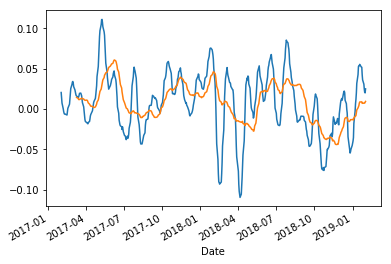

In [30]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [31]:
#!pip install fix-yahoo-finance

In [35]:
from pandas_datareader import data as pdr
import datetime as dt
import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)


try:
    # download dataframe
    data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
except ValueError:
    pass

try:
    # download Panel
    data = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
except ValueError:
    pass

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  2 of 2 downloaded


In [36]:

try:
    start = dt.datetime(2015,7,1)
    end = dt.datetime(2016,6,1)
    solar_df = pdr.get_data_yahoo(['FSLR','TAN','VSLR','RGSE'], start=start,end=end)['Close']
except ValueError:
    pass



[*********************100%***********************]  4 of 4 downloaded


In [37]:
solar_df

FSLR    RGSE        TAN   VSLR
Date                                           
2015-07-01  46.040001  1128.0  38.840000  11.66
2015-07-02  45.169998  1200.0  38.549999  10.94
2015-07-06  44.189999  1008.0  36.369999  10.19
2015-07-07  45.119999   984.0  36.099998  10.75
2015-07-08  43.270000   852.0  33.669998  10.17
2015-07-09  43.650002   876.0  35.230000  10.95
2015-07-10  44.029999   942.0  36.490002  11.34
2015-07-13  46.009998   978.0  37.369999  11.45
2015-07-14  45.810001   906.0  37.860001  11.24
2015-07-15  44.490002   888.0  37.060001  11.11
2015-07-16  44.759998   894.0  37.509998  10.89
2015-07-17  43.950001   900.0  37.480000  10.88
2015-07-20  43.279999   852.0  37.660000  15.75
2015-07-21  43.480000   894.0  37.060001  15.85
2015-07-22  42.500000   924.0  36.619999  15.84
2015-07-23  42.740002   900.0  35.880001  15.79
2015-07-24  42.970001   942.0  35.470001  15.85
2015-07-27  42.270000   966.0  34.580002  15.86
2015-07-28  43.380001   990.0  35.270000  15.83
2015-07-29  45.540001   990.0  36.240002  15.70
2015-07-30  45.310001   996.0  36.049999  15.67
2015-07-31  44.299999  1038.0  35.320000  15.26
2015-08-03  43.689999  1116.0  34.220001  15.19
2015-08-04  44.500000  1272.0  33.930000  15.16
2015-08-05  51.919998  1218.0  35.590000  15.00
2015-08-06  51.200001  1254.0  33.910000  13.69
2015-08-07  52.080002  1188.0  33.290001  13.32
2015-08-10  53.480000  1068.0  34.160000  13.31
2015-08-11  51.439999   846.0  32.779999  12.73
2015-08-12  51.880001   840.0  33.099998  12.96
...               ...     ...        ...    ...
2016-04-20  61.720001   324.0  24.160000   3.04
2016-04-21  61.939999   300.0  24.209999   3.17
2016-04-22  61.540001   312.0  24.330000   3.37
2016-04-25  60.389999   306.0  23.940001   3.30
2016-04-26  61.240002   318.0  24.330000   3.34
2016-04-27  62.029999   306.0  24.790001   3.60
2016-04-28  57.020000   306.0  24.180000   3.40
2016-04-29  55.840000   306.0  23.820000   3.34
2016-05-02  54.849998   300.0  23.530001   3.21
2016-05-03  52.849998   270.0  22.740000   2.87
2016-05-04  51.779999   276.0  22.469999   2.97
2016-05-05  51.959999   282.0  22.090000   2.64
2016-05-06  51.799999   282.0  22.129999   2.46
2016-05-09  50.599998   276.0  21.639999   2.48
2016-05-10  51.270000   276.0  21.400000   2.42
2016-05-11  50.740002   294.0  21.620001   2.26
2016-05-12  49.090000   270.0  21.170000   2.22
2016-05-13  48.560001   192.0  20.980000   2.24
2016-05-16  49.070000   210.0  21.280001   2.32
2016-05-17  48.509998   216.0  21.110001   2.26
2016-05-18  48.709999   210.0  21.200001   2.28
2016-05-19  47.090000   216.0  20.930000   2.32
2016-05-20  48.020000   192.0  21.490000   2.52
2016-05-23  49.040001   198.0  21.820000   2.69
2016-05-24  50.459999   204.0  22.059999   2.72
2016-05-25  50.560001   204.0  22.090000   2.75
2016-05-26  49.730000   186.0  21.969999   2.63
2016-05-27  49.900002   198.0  21.959999   3.74
2016-05-31  49.650002   180.0  22.010000   3.59
2016-06-01  50.070000   180.0  22.100000   3.29

[232 rows x 4 columns]

<h4>Let's calculate returns (the 1 day percent change)</h4>

In [38]:
rets = solar_df.pct_change()
print(rets)

                FSLR      RGSE       TAN      VSLR
Date                                              
2015-07-01       NaN       NaN       NaN       NaN
2015-07-02 -0.018897  0.063830 -0.007467 -0.061750
2015-07-06 -0.021696 -0.160000 -0.056550 -0.068556
2015-07-07  0.021045 -0.023810 -0.007424  0.054956
2015-07-08 -0.041002 -0.134146 -0.067313 -0.053953
2015-07-09  0.008782  0.028169  0.046332  0.076696
2015-07-10  0.008706  0.075342  0.035765  0.035616
2015-07-13  0.044969  0.038217  0.024116  0.009700
2015-07-14 -0.004347 -0.073620  0.013112 -0.018341
2015-07-15 -0.028815 -0.019868 -0.021130 -0.011566
2015-07-16  0.006069  0.006757  0.012142 -0.019802
2015-07-17 -0.018096  0.006711 -0.000800 -0.000918
2015-07-20 -0.015245 -0.053333  0.004803  0.447610
2015-07-21  0.004621  0.049296 -0.015932  0.006349
2015-07-22 -0.022539  0.033557 -0.011873 -0.000631
2015-07-23  0.005647 -0.025974 -0.020207 -0.003157
2015-07-24  0.005381  0.046667 -0.011427  0.003800
2015-07-27 -0.016290  0.025478 

<h4>Let's visualize the relationship between each stock and the ETF</h4>

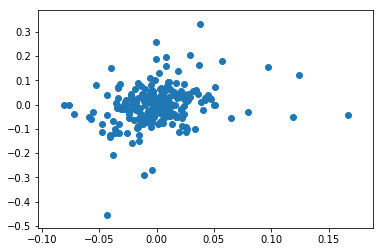

In [39]:
import matplotlib.pyplot as plt
list(rets)
plt.scatter(rets.FSLR, rets.RGSE)

In [40]:
rets.head(3)

FSLR     RGSE       TAN      VSLR
Date                                             
2015-07-01       NaN      NaN       NaN       NaN
2015-07-02 -0.018897  0.06383 -0.007467 -0.061750
2015-07-06 -0.021696 -0.16000 -0.056550 -0.068556

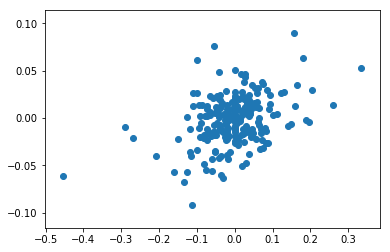

In [41]:
plt.scatter(rets.RGSE,rets.TAN)

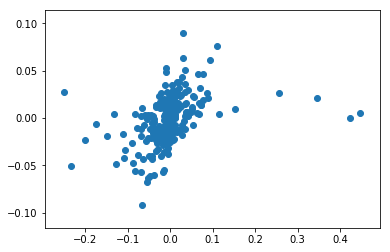

In [42]:
plt.scatter(rets.VSLR,rets.TAN)

<h4>The correlation matrix</h4>

In [43]:
solar_corr = rets.corr()
print(solar_corr)

          FSLR      RGSE       TAN      VSLR
FSLR  1.000000  0.248351  0.670156  0.215543
RGSE  0.248351  1.000000  0.385864  0.045971
TAN   0.670156  0.385864  1.000000  0.390840
VSLR  0.215543  0.045971  0.390840  1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

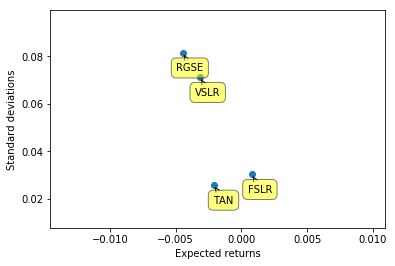

In [44]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [45]:
#!pip install --upgrade --no-deps statsmodels
!pip install patsy

In [46]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','VSLR']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     321.0
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.55e-81
Time:                        11:06:58   Log-Likelihood:                -493.63
No. Observations:                 232   AIC:                             995.3
Df Residuals:                     228   BIC:                             1009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8947      1.321     12.794      0.0

<h4>Finally plot the fitted line with the actual y values

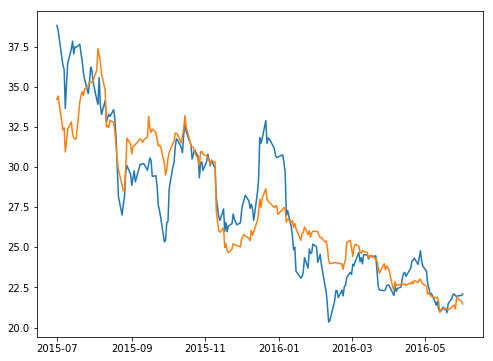

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)